In [3]:
%rm -rf __pycache__/ ../metrics/__pycache__

In [5]:
import sys, os
sys.path.append(os.path.abspath("../metrics/"))
import numpy as np
import bin_optimizer as bo
import place_from_map as pm
import matplotlib.pyplot as plt
import mplhep as hep
import ROC_curves

ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x1553711c6710>, cbar=<matplotlib.colorbar.Colorbar object at 0x155370f81250>, text=[])

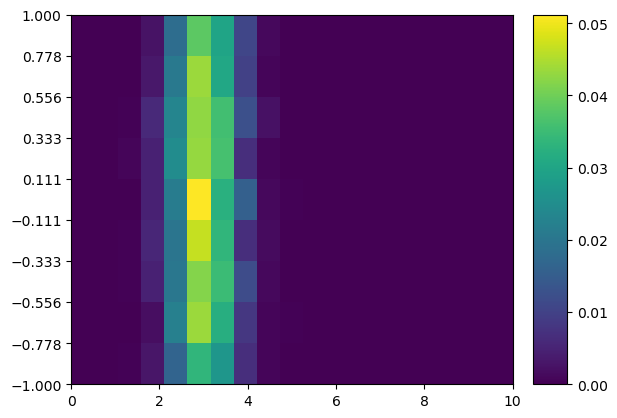

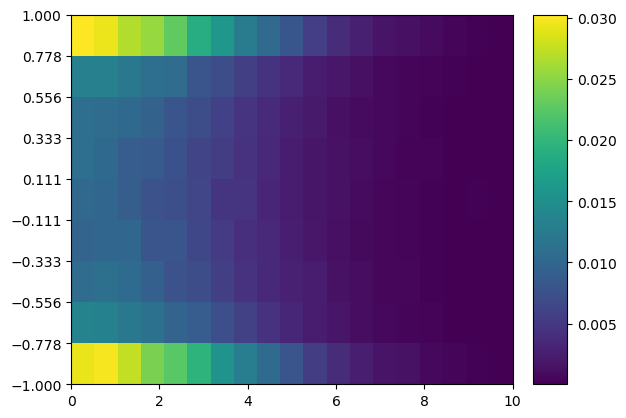

In [7]:
testing1 = np.hstack(
    (
        np.random.normal(3, 0.5, (20000,1)), 
        np.random.choice([-1, 1], size=(20000,1))*np.sinh(np.random.rand(20000,1)*2*np.pi)
    ),
)


testing2 = np.hstack(
    (
        np.abs(np.random.normal(0, 3, (100000,1))),
        np.cos(np.random.rand(100000,1)*2*np.pi)
    )
)

bins = np.linspace(0, 10, 20)
bins2 = np.linspace(-1,1,10)

signal, *_ = np.histogram2d(testing1[:,0], testing1[:,1], (bins, bins2))
signal = signal/np.sum(signal)
bkg, *_ = np.histogram2d(testing2[:,0], testing2[:,1], (bins, bins2))
bkg = bkg/np.sum(bkg)

plt.figure()
hep.hist2dplot(signal, bins, bins2)
plt.figure()
hep.hist2dplot(bkg, bins, bins2)

# ROC_curves.ROC_score(signal.astype(float), bkg.astype(float))

In [36]:
import importlib
importlib.reload(bo)

<module 'bin_optimizer' from '/scratch16/mswartz1/msrivas6/CMSSW_14_0_0/src/bin_merging/optimized_binning/merging/bin_optimizer.py'>

In [37]:
%rm .*.npy .*.hdf5

rm: cannot remove '.*.npy': No such file or directory
rm: cannot remove '.*.hdf5': No such file or directory


In [52]:
signal.shape

(19, 9)

In [ ]:
19*9

171

In [38]:
merger = bo.MergerNonlocal(
    (
        bins,
        bins2
    ),
    signal.copy(),
    bkg.copy(),
    map_at=(
        3,
    )
)
new_bins = merger.run(3)
print(new_bins)
# signalNew, _ = np.histogram(testing1, new_bins)
# bkgNew, _ = np.histogram(testing2, new_bins)
# hep.histplot([signalNew, bkgNew], new_bins);
# ROC_curves.ROC_score(signalNew.astype(float), bkgNew.astype(float))


[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.00036819 0.         0.00036819 0.00036819 0.         0.00073638
 0.00036819 0.         0.         0.00294551 0.00184094 0.00478645
 0.00552283 0.00478645 0.00478645 0.00589102 0.0033137  0.00257732
 0.01620029 0.02209131 0.02025037 0.01988218 0.02135493 0.02466863
 0.02319588 0.02061856 0.01804124 0.03350515 0.04344624 0.0416053
 0.04675994 0.0511782  0.04307806 0.04270987 0.04344624 0.03829161
 0.02687776 0.0320324  0.03497791 0.03350515 0.03240059 0.03608247
 0.03571429 0.03055965 0.02982327 0.00662739 0.00810015 0.01178203
 0.00662739 0.01546392 0.00662739 0.01251841 0.00994109 0.01067747
 0.00073638 0.00073638 0.00110457 0.00147275 0.00110457 0.00073638
 0.00220913 0.00073638 0.00110457 0.         0.00036819 0.
 0.         0.00036819 0.         0.         0.         0.
 0.         0.         0.         0.

Binning non-locally:: 100%|██████████| 168/168 [00:03<00:00, 52.55it/s]

[[0.01362297 0.69661267 0.28976436]
 [0.60538301 0.14284284 0.25177415]]


In [83]:
importlib.reload(pm)

<module 'place_from_map' from '/scratch16/mswartz1/msrivas6/CMSSW_14_0_0/src/bin_merging/optimized_binning/merging/place_from_map.py'>

In [85]:
pm.place_event_nonlocal(
    3,
    4,
    0.9,
    verbose=True
)

original index of: 7
This places your point in the range:
[ 3.6842105263157894 , 4.2105263157894735 ]
original index of: 8
This places your point in the range:
[ 0.7777777777777777 , 1.0 ]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 0 2
 2 1 1 1 1 1 2 2 2 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 2 2 2 1 2 1 2 1 2 2 0 0
 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


2

In [84]:
pm.place_array_nonlocal(
    3,
    [
        [9,0],
        [4,0.9]
    ],
    verbose=True
)

Original indices
[[17  4]
 [ 7  8]]


array([0, 2], dtype=uint32)

In [135]:
import importlib
importlib.reload(bo)

<module 'bin_optimizer' from '/scratch16/mswartz1/msrivas6/CMSSW_14_0_0/src/bin_merging/optimized_binning/merging/bin_optimizer.py'>

Binning locally:: 100%|██████████| 6/6 [00:00<00:00, 3018.93it/s]

[[inf inf inf]
 [inf inf inf]
 [inf inf inf]
 [inf inf inf]
 [inf inf inf]
 [inf inf inf]
 [inf inf inf]
 [inf inf inf]]
5 6
[[0.00000000e+00 1.00000000e+00 1.21960615e+15]
 [1.00000000e+00 2.00000000e+00 1.05139458e+17]
 [2.00000000e+00 3.00000000e+00 6.67639729e+15]
 [3.00000000e+00 4.00000000e+00 1.30844621e+15]
 [4.00000000e+00 5.00000000e+00 2.43846963e+10]
 [5.00000000e+00 6.00000000e+00 0.00000000e+00]
 [6.00000000e+00 7.00000000e+00 0.00000000e+00]]
5 6
[[0.00000000e+00 1.00000000e+00 1.21960615e+15]
 [1.00000000e+00 2.00000000e+00 1.05139458e+17]
 [2.00000000e+00 3.00000000e+00 6.67639729e+15]
 [3.00000000e+00 4.00000000e+00 1.30844621e+15]
 [4.00000000e+00 5.00000000e+00 5.19539084e+10]
 [5.00000000e+00 6.00000000e+00 0.00000000e+00]]
5 6
[[0.00000000e+00 1.00000000e+00 1.21960615e+15]
 [1.00000000e+00 2.00000000e+00 1.05139458e+17]
 [2.00000000e+00 3.00000000e+00 6.67639729e+15]
 [3.00000000e+00 4.00000000e+00 1.30844621e+15]
 [4.00000000e+00 5.00000000e+00 6.51872811e+10]]


0.8084426712877234

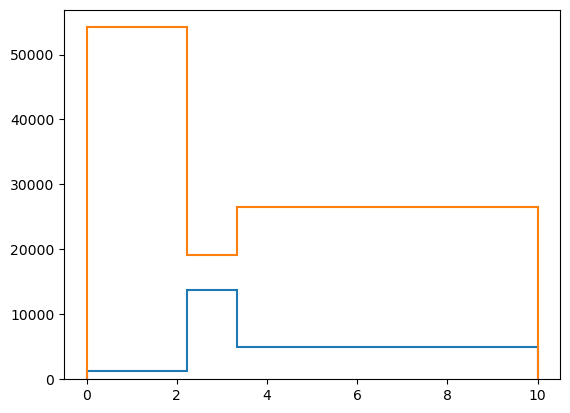

In [137]:
merger = bo.MergerLocal(
    bins.copy(),
    signal.copy(),
    bkg.copy()
)
new_bins = merger.run(3)
print(new_bins)
signalNew, _ = np.histogram(testing1, new_bins)
bkgNew, _ = np.histogram(testing2, new_bins)
hep.histplot([signalNew, bkgNew], new_bins)
ROC_curves.ROC_curve(signalNew.astype(float), bkgNew.astype(float))
